In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/newspaperlayout/zip/kaggle/working/new_folder/00767.jpg
/kaggle/input/newspaperlayout/zip/kaggle/working/new_folder/00266.jpg
/kaggle/input/newspaperlayout/zip/kaggle/working/new_folder/00847.jpg
/kaggle/input/newspaperlayout/zip/kaggle/working/new_folder/00822.jpg
/kaggle/input/newspaperlayout/zip/kaggle/working/new_folder/00614.jpg
/kaggle/input/newspaperlayout/zip/kaggle/working/new_folder/00878.jpg
/kaggle/input/newspaperlayout/zip/kaggle/working/new_folder/00091.jpg
/kaggle/input/newspaperlayout/zip/kaggle/working/new_folder/01306.jpg
/kaggle/input/newspaperlayout/zip/kaggle/working/new_folder/00838.jpg
/kaggle/input/newspaperlayout/zip/kaggle/working/new_folder/00296.jpg
/kaggle/input/newspaperlayout/zip/kaggle/working/new_folder/01000.jpg
/kaggle/input/newspaperlayout/zip/kaggle/working/new_folder/01179.jpg
/kaggle/input/newspaperlayout/zip/kaggle/working/new_folder/00219.jpg
/kaggle/input/newspaperlayout/zip/kaggle/working/new_folder/01029.jpg
/kaggle/input/newspa

In [ ]:
from pathlib import Path

train_images_directory = Path("/kaggle/input/newspaperlayout/zip/kaggle/working/new_folder")
train_labels_path = Path("/kaggle/input/newspaperlayout/zip/kaggle/working/new_folder/coco_annotations.json")


In [3]:
!ls /kaggle/input/newspaperlayout/zip/kaggle/working/new_folder/*.json

/kaggle/input/newspaperlayout/zip/kaggle/working/new_folder/coco_annotations.json


In [4]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm 
import matplotlib.pyplot as plt
import json
import cv2
import copy
from typing import Optional

In [5]:
!pip install -q pycocotools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pycocotools.coco import COCO
from PIL import Image
import json
import random
from pathlib import Path
%matplotlib inline
sns.set_theme(style='darkgrid', palette='deep', font='sans-serif', font_scale=1)

In [6]:
with train_labels_path.open() as f:
    train_dict = json.load(f)

# with test_metadata_path.open() as f:
#     test_dict = json.load(f)

train_coco_labels=COCO(annotation_file=train_labels_path)

loading annotations into memory...
Done (t=5.61s)
creating index...
index created!


In [7]:
def print_columns(_columns, _description):
    print(_description)
    for column in _columns:
        print(column)
    print()

In [ ]:
print("There are " + str(len(train_dict['categories'])) + " categories.\n")
# print("There are " + str(len(test_dict['images']) + len(train_dict['images'])) + " images in the dataset.")
print("There are " + str(len(train_dict['images'])) + " images in the train set.")
# print("There are " + str(len(test_dict['images'])) + " images in the test set.\n")
print("There are " + str(len(train_dict['annotations'])) + " annotations in the train set.\n")

print_columns(train_dict.keys(), "Fields in COCO format of train labels:")
print("We will focus on mainly categories, images and annotations.")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import matplotlib.colors as mcolors
train_coco_annotations = COCO("/kaggle/input/newspaperlayout/zip/kaggle/working/new_folder/coco_annotations.json")

train_images_directory = Path("/kaggle/input/newspaperlayout/zip/kaggle/working/new_folder")
def visualize_random_image_with_segmentations(coco_annotations, figsize=(10, 10)):
    image_ids = coco_annotations.getImgIds()
    filtered_image_ids = [img_id for img_id in image_ids if 1 <= img_id <= 900]
    random_image_id = random.choice(filtered_image_ids)

    image_info = coco_annotations.loadImgs([random_image_id])[0]

    # Load and display the image
    image_path = train_images_directory / image_info["file_name"]
    image = plt.imread(image_path)
    
    plt.figure(figsize=figsize)  # Set the figure size
    plt.imshow(image)

    # Load and display segmentations
    annotation_ids = coco_annotations.getAnnIds(imgIds=[random_image_id])
    annotations = coco_annotations.loadAnns(annotation_ids)

    for ann in annotations:
        segmentation = ann["segmentation"]
        for seg_points in segmentation:
            seg_points = np.array(seg_points).reshape(-1, 2)  # Reshape flat list to pairs of (x, y) coordinates
            
            # Generate a random color with reduced alpha for the segmentation
            color = np.random.rand(3,)
            rgba_color = tuple(list(color) + [0.2])  # Set alpha value to 0.5
            
            poly = Polygon(seg_points, edgecolor='r', facecolor=rgba_color, linewidth=1)
            plt.gca().add_patch(poly)

    plt.title(f"Image ID: {random_image_id}")
    plt.axis('off')
    plt.show()


In [8]:
visualize_random_image_with_segmentations(train_coco_annotations, figsize=(15, 15))


NameError: name 'visualize_random_image_with_segmentations' is not defined

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import matplotlib.colors as mcolors
train_coco_annotations = COCO("/kaggle/input/newspaperlayout/zip/kaggle/working/new_folder/coco_annotations.json")

train_images_directory = Path("/kaggle/input/newspaperlayout/zip/kaggle/working/new_folder")

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

def visualize_random_image_with_light_bounding_boxes(coco_annotations, figsize=(10, 10)):
    image_ids = coco_annotations.getImgIds()
    filtered_image_ids = [img_id for img_id in image_ids if 1 <= img_id <= 900]
    random_image_id = random.choice(filtered_image_ids)
    image_info = coco_annotations.loadImgs([random_image_id])[0]

    # Load and display the image
    image_path = train_images_directory / image_info["file_name"]
    image = plt.imread(image_path)
    
    plt.figure(figsize=figsize)  # Set the figure size
    plt.imshow(image)
    

    # Load and display segmentations
    annotation_ids = coco_annotations.getAnnIds(imgIds=[random_image_id])
    annotations = coco_annotations.loadAnns(annotation_ids)

    for ann in annotations:
        segmentation = ann["segmentation"]
        for seg_points in segmentation:
            seg_points = np.array(seg_points).reshape(-1, 2)  # Reshape flat list to pairs of (x, y) coordinates
            
            light_color = (0.0, 0.0, 1.0, 0.5)  # Very light color with low alpha value
            
            poly = Polygon(seg_points, edgecolor=light_color, facecolor=light_color, linewidth=1)
            plt.gca().add_patch(poly)

    plt.title(f"Image ID: {random_image_id}")
    plt.axis('off')
    plt.show()

# Example usage with larger image size
visualize_random_image_with_light_bounding_boxes(train_coco_annotations, figsize=(15, 15))

In [ ]:
def show_image(_image_id):
    image_file = train_coco_labels.loadImgs([_image_id])[0]['file_name']
    image = Image.open(train_images_directory/image_file)
    plt.figure(figsize=(15, 15))
    plt.axis('off')
    plt.imshow(np.asarray(image))
#     plt.savefig("show_image.png")

In [ ]:
def show_segmentations(_image_id):
    show_image(_image_id)
    annotation_ids = train_coco_labels.getAnnIds(imgIds=[_image_id])
    annotations = train_coco_labels.loadAnns(annotation_ids)
    
    train_coco_labels.showAnns(annotations)
#     plt.savefig("imagecurry.png")

In [ ]:
def get_random_image_id(coco_annotations):
    img_ids = list(coco_annotations.imgs.keys())
    return random.choice(img_ids)

# Example usage to generate a random image ID
random_image_id = get_random_image_id(train_coco_annotations)
show_segmentations(random_image_id)

In [ ]:
import random
train_coco_annotations = COCO("/kaggle/input/newspaperlayout/zip/kaggle/working/new_folder/coco_annotations.json")

train_images_directory = Path("/kaggle/input/newspaperlayout/zip/kaggle/working/new_folder")


# Function to get a random image ID from the COCO annotations
def get_random_image_id(coco_annotations):
    img_ids = list(coco_annotations.imgs.keys())
    return random.choice(img_ids)

# Example usage to generate a random image ID
random_image_id = get_random_image_id(train_coco_annotations)
print("Random Image ID:", random_image_id)



def show_binary_mask(_image_id, _category_id):
    annotation_ids = train_coco_labels.getAnnIds(imgIds=[_image_id], catIds=[_category_id])
    annotations = train_coco_labels.loadAnns(annotation_ids)
#     print(annotations)
    image_height = train_coco_labels.loadImgs([_image_id])[0]['height']
    image_width = train_coco_labels.loadImgs([_image_id])[0]['width']
    binary_mask=np.zeros((image_height, image_width))
    for annotation in annotations:
        current_mask=train_coco_labels.annToMask(annotation)
        binary_mask += current_mask
    plt.axis('off')
    plt.imshow(binary_mask)

def show_categorywise_binary_mask(_image_id):
    plt.figure(figsize=(15, 15))
    
    plt.subplot(231)
    plt.title('Image')
    plt.savefig("Image_Binary.png")
    show_binary_mask(_image_id, 1)
    
    plt.subplot(232)
    plt.title('News')
    plt.savefig("News_Binary.png")
    show_binary_mask(_image_id, 2)
    
    plt.subplot(233)
    plt.title('Paragraph')
    plt.savefig("Paragraph_Binary.png")
    show_binary_mask(_image_id, 3)
    
    plt.subplot(234)
    plt.title('Table')
    plt.savefig("Table_Binary.png")
    show_binary_mask(_image_id, 4)
    
    plt.subplot(235)
    plt.title('Text Box')
    plt.savefig("Text_Binary.png")
    show_binary_mask(_image_id, 5)

    plt.show()

In [ ]:
show_image(792)


In [ ]:
show_categorywise_binary_mask(792)


In [25]:
train_categories = pd.DataFrame(train_dict['categories'])
train_categories.head()

,id,name
0,1,image
1,2,news
2,3,paragraph
3,4,table
4,5,text box


In [26]:
train_categories.rename(columns={"id":"category_id"}, inplace=True)

train_categories

,category_id,name
0,1,image
1,2,news
2,3,paragraph
3,4,table
4,5,text box


In [27]:
print(train_categories)


   category_id       name
0            1      image
1            2       news
2            3  paragraph
3            4      table
4            5   text box


In [28]:
train_images = pd.DataFrame(train_dict["images"])
train_images.head()

,id,license,file_name,height,width,date_captured
0,0,1,00822.jpg,4080,3072,2024-03-14T14:49:22+00:00
1,1,1,01166.jpg,4080,3072,2024-03-14T14:49:22+00:00
2,2,1,01231.jpg,4080,3072,2024-03-14T14:49:22+00:00
3,3,1,01160.jpg,4080,3072,2024-03-14T14:49:22+00:00
4,4,1,00233.jpg,4032,3024,2024-03-14T14:49:22+00:00


In [29]:
print("\nDropping license and date_captured.\nRenaming id to image_id.\n")
train_images.drop(['license', 'date_captured'], axis=1, inplace=True)
train_images.rename(columns={"id":"image_id"}, inplace=True)
print("train_images shape: " + str(train_images.shape) + "\n")
train_images.head(5)


Dropping license and date_captured.
Renaming id to image_id.

train_images shape: (1313, 4)



,image_id,file_name,height,width
0,0,00822.jpg,4080,3072
1,1,01166.jpg,4080,3072
2,2,01231.jpg,4080,3072
3,3,01160.jpg,4080,3072
4,4,00233.jpg,4032,3024


In [30]:
#adding area and aspect_ratio
print("\nAdding area and aspect_ratio of images.\n")
train_images['area']=train_images['height']*train_images['width']
train_images['aspect_ratio']=train_images['height']/train_images['width']
train_images.head()


Adding area and aspect_ratio of images.



,image_id,file_name,height,width,area,aspect_ratio
0,0,00822.jpg,4080,3072,12533760,1.328125
1,1,01166.jpg,4080,3072,12533760,1.328125
2,2,01231.jpg,4080,3072,12533760,1.328125
3,3,01160.jpg,4080,3072,12533760,1.328125
4,4,00233.jpg,4032,3024,12192768,1.333333


In [31]:
train_images.describe()


,image_id,height,width,area,aspect_ratio
count,1313.000000,1313.000000,1313.000000,1.313000e+03,1313.000000
mean,615.696116,3573.476009,2839.776847,1.032269e+07,1.269402
std,327.708089,915.047976,412.000309,3.522259e+06,0.320463
min,0.000000,1440.000000,1080.000000,1.555200e+06,0.636459
25%,328.000000,3134.000000,2714.000000,6.447616e+06,1.333333
50%,656.000000,4000.000000,3000.000000,1.200000e+07,1.333333
75%,928.000000,4160.000000,3096.000000,1.278029e+07,1.333333
max,1097.000000,5500.000000,4141.000000,2.277550e+07,2.173913


In [32]:
train_annotations = pd.DataFrame(train_dict['annotations'])
train_annotations.head()

,id,image_id,category_id,bbox,area,segmentation,iscrowd
0,0,0,1,"[710, 236, 883.2, 427.125]",377236.800,"[[710.4, 235.875, 710.4, 650.25, 715.2, 656.62...",0
1,1,0,1,"[163, 402, 129.6, 178.5]",23133.600,"[[163.2, 401.625, 163.2, 580.125, 283.2, 580.1...",0
2,2,0,2,"[1690, 2843, 9.6, 19.125]",183.600,"[[1694.4, 2843.25, 1694.4, 2856, 1689.6, 2862....",0
3,3,0,1,"[206, 1981, 124.8, 129.014]",16100.935,"[[207.867, 1983.333, 206.4, 2110.125, 307.2, 2...",0
4,4,0,5,"[1262, 1587, 192, 38.25]",7344.000,"[[1262.4, 1587.375, 1262.4, 1625.625, 1454.4, ...",0


In [33]:
# adding bbox_area and bbox_aspect_ratio
print("\nRenaming id to annotation_id.\nAdding bbox_area, bbox_aspect_ratio.\n")
train_annotations.rename(columns={"id":"annotation_id"}, inplace=True)
bbox_area=[]
bbox_aspect_ratio=[]
for idx in train_annotations.index:
    bbox_area.append(train_annotations['bbox'][idx][3]*train_annotations['bbox'][idx][2])
    bbox_aspect_ratio.append(train_annotations['bbox'][idx][3]/train_annotations['bbox'][idx][2])
train_annotations['bbox_area']=bbox_area
train_annotations['bbox_aspect_ratio']=bbox_aspect_ratio
print("train_annotations shape: " + str(train_annotations.shape) + "\n")
train_annotations["category_id"].unique()
train_annotations.head()


Renaming id to annotation_id.
Adding bbox_area, bbox_aspect_ratio.

train_annotations shape: (436508, 9)



,annotation_id,image_id,category_id,bbox,area,segmentation,iscrowd,bbox_area,bbox_aspect_ratio
0,0,0,1,"[710, 236, 883.2, 427.125]",377236.800,"[[710.4, 235.875, 710.4, 650.25, 715.2, 656.62...",0,377236.8000,0.483611
1,1,0,1,"[163, 402, 129.6, 178.5]",23133.600,"[[163.2, 401.625, 163.2, 580.125, 283.2, 580.1...",0,23133.6000,1.377315
2,2,0,2,"[1690, 2843, 9.6, 19.125]",183.600,"[[1694.4, 2843.25, 1694.4, 2856, 1689.6, 2862....",0,183.6000,1.992188
3,3,0,1,"[206, 1981, 124.8, 129.014]",16100.935,"[[207.867, 1983.333, 206.4, 2110.125, 307.2, 2...",0,16100.9472,1.033766
4,4,0,5,"[1262, 1587, 192, 38.25]",7344.000,"[[1262.4, 1587.375, 1262.4, 1625.625, 1454.4, ...",0,7344.0000,0.199219


In [34]:
train_annotations.describe()


,annotation_id,image_id,category_id,area,iscrowd,bbox_area,bbox_aspect_ratio
count,436508.000000,436508.000000,436508.000000,4.365080e+05,436508.0,4.365080e+05,436508.000000
mean,153435.452331,753.840019,3.930283,7.618720e+04,0.0,7.618721e+04,0.567920
std,63523.212553,296.449076,1.275919,2.597567e+05,0.0,2.597567e+05,0.764047
min,0.000000,0.000000,1.000000,7.000000e-03,0.0,7.000000e-03,0.003713
25%,109126.750000,539.000000,3.000000,3.457526e+03,0.0,3.457527e+03,0.197559
50%,186344.000000,915.000000,5.000000,1.352000e+04,0.0,1.351998e+04,0.352431
75%,195959.000000,963.000000,5.000000,5.438860e+04,0.0,5.438855e+04,0.693656
max,240239.000000,1097.000000,5.000000,1.035530e+07,0.0,1.035530e+07,174.500000


In [35]:
train_images.describe()


,image_id,height,width,area,aspect_ratio
count,1313.000000,1313.000000,1313.000000,1.313000e+03,1313.000000
mean,615.696116,3573.476009,2839.776847,1.032269e+07,1.269402
std,327.708089,915.047976,412.000309,3.522259e+06,0.320463
min,0.000000,1440.000000,1080.000000,1.555200e+06,0.636459
25%,328.000000,3134.000000,2714.000000,6.447616e+06,1.333333
50%,656.000000,4000.000000,3000.000000,1.200000e+07,1.333333
75%,928.000000,4160.000000,3096.000000,1.278029e+07,1.333333
max,1097.000000,5500.000000,4141.000000,2.277550e+07,2.173913


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


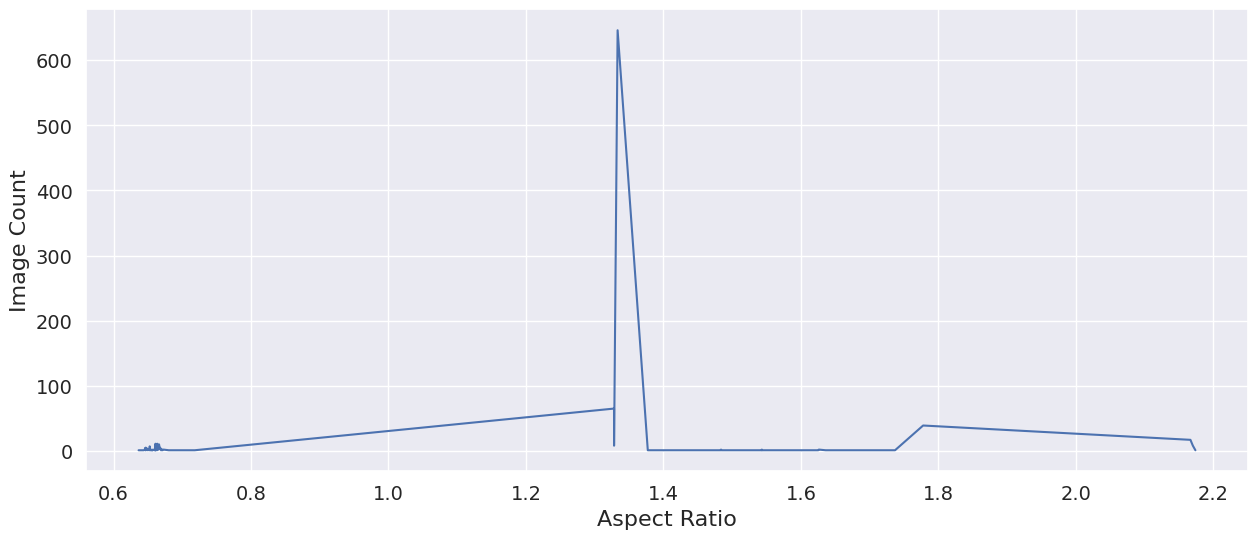

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

train_images_aspect_ratio_count = train_images.groupby('aspect_ratio', as_index=False)['image_id'].nunique()
train_images_aspect_ratio_count.rename(columns={'image_id':'image_count'}, inplace=True)

plt.figure(figsize=(15, 6))
# plt.title("Aspect Ratio vs Image Count Line Plot", fontsize=16)  # Increase title font size
sns.lineplot(x=train_images_aspect_ratio_count['aspect_ratio'], y=train_images_aspect_ratio_count['image_count'])
plt.xlabel("Aspect Ratio", fontsize=16)  # Increase x-axis label font size
plt.ylabel("Image Count", fontsize=16)    # Increase y-axis label font size
plt.xticks(fontsize=14)  # Increase x-axis tick font size
plt.yticks(fontsize=14)  # Increase y-axis tick font size
plt.show()


In [ ]:
print(train_categories)


In [ ]:
img_cat_count

In [ ]:
category_mapping = {
    0: 'image',
    1: 'news',
    2: 'paragraph',
    3: 'table',
    4: 'text box'
}

img_cat_count['category_name'] = img_cat_count['category_id'].map(category_mapping)
img_cat_count

In [37]:
img_cat_count = train_annotations[['image_id', 'category_id']].copy()
print(img_cat_count["category_id"].unique())
category_names = []
for idx in img_cat_count.index:
    category_names.append(train_categories['name'][img_cat_count['category_id'][idx]])

img_cat_count['category_name'] = category_names
img_cat_count['category_name']=category_names
img_cat_count[train_categories['name'][0]] = img_cat_count['category_id'] == train_categories['category_id'][0]
img_cat_count[train_categories['name'][1]] = img_cat_count['category_id'] == train_categories['category_id'][1]
img_cat_count[train_categories['name'][2]] = img_cat_count['category_id'] == train_categories['category_id'][2]
img_cat_count[train_categories['name'][3]] = img_cat_count['category_id'] == train_categories['category_id'][3]
img_cat_count[train_categories['name'][4]] = img_cat_count['category_id'] == train_categories['category_id'][4]

# img_cat_count['category_name'] = img_cat_count['category_id'].map(category_mapping)

[1 2 5 3 4]


KeyError: 5

In [ ]:
train_categories = pd.DataFrame(train_dict['categories'])
train_categories.head()

In [ ]:
img_cat_count = train_annotations[['image_id', 'category_id']].copy()
print(img_cat_count["category_id"].unique())
category_names=[]
for idx in img_cat_count.index:
    category_names.append(train_categories['name'][img_cat_count['category_id'][idx]])
# print(category_names)
img_cat_count['category_name']=category_names
img_cat_count[train_categories['name'][1]] = img_cat_count['category_id'] == train_categories['category_id'][1]
img_cat_count[train_categories['name'][2]] = img_cat_count['category_id'] == train_categories['category_id'][2]
img_cat_count[train_categories['name'][3]] = img_cat_count['category_id'] == train_categories['category_id'][3]
img_cat_count[train_categories['name'][4]] = img_cat_count['category_id'] == train_categories['category_id'][4]
img_cat_count[train_categories['name'][5]] = img_cat_count['category_id'] == train_categories['category_id'][5]
img_cat_count.head()
img_cat_count['category_name'] = img_cat_count['category_id'].map(category_mapping)

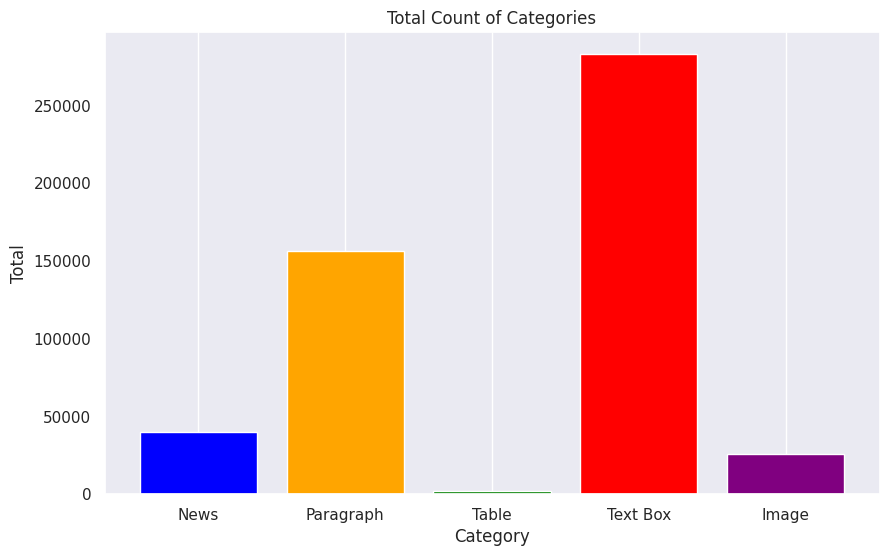

In [9]:
import matplotlib.pyplot as plt

# Define the categories and their corresponding totals
categories = ['News', 'Paragraph', 'Table', 'Text Box', 'Image']
totals = [39952, 156498, 1844, 282934, 25790]

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(categories, totals, color=['blue', 'orange', 'green', 'red', 'purple'])

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Total')
plt.title('Total Count of Categories')
plt.grid(axis='y')

# Show plot
plt.show()


loading annotations into memory...
Done (t=6.17s)
creating index...
index created!


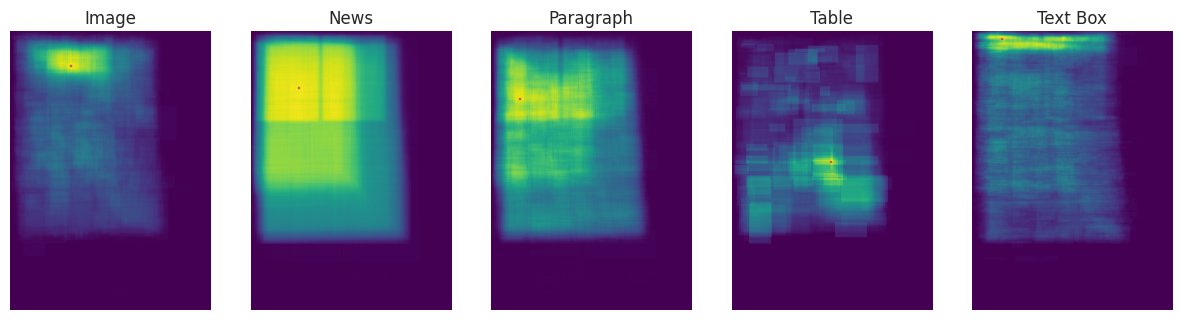

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Rectangle
from pycocotools.coco import COCO
from pathlib import Path
train_coco_annotations = COCO("/kaggle/input/newspaperlayout/zip/kaggle/working/new_folder/coco_annotations.json")

train_images_directory = Path("/kaggle/input/newspaperlayout/zip/kaggle/working/new_folder")
category_id_to_name = {
    1: "Image",
    2: "News",
    3: "Paragraph",
    4: "Table",
    5: "Text Box"
}

def visualize_annotations_heatmap(coco_annotations, target_class_ids):
    # Define colormap for the heatmap
#     cmap = LinearSegmentedColormap.from_list("", ["blue", "cyan"])
    cmap = 'viridis'

    # Initialize maximum coordinates of bounding boxes
    max_x, max_y = 0, 0

    # Iterate over each image
    for img_id in coco_annotations.imgs:
        img_info = coco_annotations.loadImgs(img_id)[0]
        image_path = train_images_directory / img_info["file_name"]
        image = plt.imread(image_path)

        # Load annotations for the image
        annotation_ids = coco_annotations.getAnnIds(imgIds=[img_id], catIds=target_class_ids)
        annotations = coco_annotations.loadAnns(annotation_ids)

        # Update maximum coordinates of bounding boxes
        for ann in annotations:
            bbox = ann['bbox']
            bbox_x, bbox_y, bbox_width, bbox_height = bbox
            bbox_x_end = bbox_x + bbox_width
            bbox_y_end = bbox_y + bbox_height

            max_x = max(max_x, bbox_x_end)
            max_y = max(max_y, bbox_y_end)

    # Determine heatmap size based on maximum coordinates
    heatmap_size = (int(max_y) + 20, int(max_x) + 20)  # Add some padding for better visualization

    # Initialize heatmaps for each class
    heatmaps = [np.zeros(heatmap_size) for _ in range(len(target_class_ids))]

    # Iterate over each image again to update heatmaps
    for img_id in coco_annotations.imgs:
        img_info = coco_annotations.loadImgs(img_id)[0]
        image_path = train_images_directory / img_info["file_name"]
        image = plt.imread(image_path)

        # Load annotations for the image
        annotation_ids = coco_annotations.getAnnIds(imgIds=[img_id], catIds=target_class_ids)
        annotations = coco_annotations.loadAnns(annotation_ids)

        # Update heatmap for each class
        for ann in annotations:
            category_id = ann['category_id']
            bbox = ann['bbox']
            bbox_x, bbox_y, bbox_width, bbox_height = bbox
            bbox_x_end = bbox_x + bbox_width
            bbox_y_end = bbox_y + bbox_height

            # Update heatmap counts for each pixel within the bounding box
            heatmaps[target_class_ids.index(category_id)][int(bbox_y):int(bbox_y_end), int(bbox_x):int(bbox_x_end)] += 1

    # Plot the heatmaps
    fig, axes = plt.subplots(1, len(target_class_ids), figsize=(15, 5))
    for i, (heatmap, class_id) in enumerate(zip(heatmaps, target_class_ids)):
        axes[i].imshow(heatmap, cmap=cmap)
        axes[i].set_title(category_id_to_name[class_id])  # Use category name based on the dictionary
        axes[i].axis('off')

        # Add bounding box for visualization
        max_value = np.max(heatmap)
        max_index = np.argmax(heatmap)
        max_y, max_x = np.unravel_index(max_index, heatmap.shape)
        max_bbox = Rectangle((max_x-10, max_y-10), 20, 20, linewidth=1, edgecolor='r', facecolor='none')
        axes[i].add_patch(max_bbox)

    plt.show()

# Example usage with classes 1, 2, 3, 4, and 5
target_class_ids = [1, 2, 3, 4, 5]
visualize_annotations_heatmap(train_coco_annotations, target_class_ids)

loading annotations into memory...
Done (t=6.31s)
creating index...
index created!


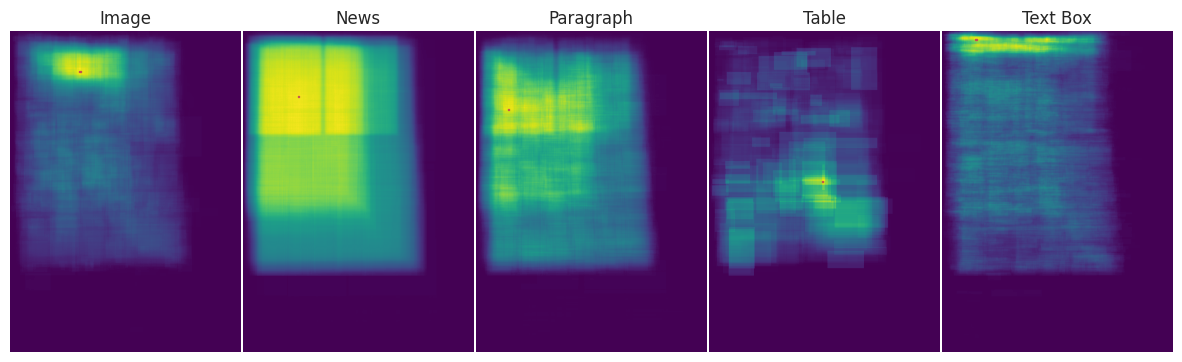

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Rectangle
from pycocotools.coco import COCO
from pathlib import Path

train_coco_annotations = COCO("/kaggle/input/newspaperlayout/zip/kaggle/working/new_folder/coco_annotations.json")
train_images_directory = Path("/kaggle/input/newspaperlayout/zip/kaggle/working/new_folder")

category_id_to_name = {
    1: "Image",
    2: "News",
    3: "Paragraph",
    4: "Table",
    5: "Text Box"
}

def visualize_annotations_heatmap(coco_annotations, target_class_ids):
    # Define colormap for the heatmap
    cmap = 'viridis'

    # Initialize maximum coordinates of bounding boxes
    max_x, max_y = 0, 0

    # Iterate over each image
    for img_id in coco_annotations.imgs:
        img_info = coco_annotations.loadImgs(img_id)[0]
        image_path = train_images_directory / img_info["file_name"]
        image = plt.imread(image_path)

        # Load annotations for the image
        annotation_ids = coco_annotations.getAnnIds(imgIds=[img_id], catIds=target_class_ids)
        annotations = coco_annotations.loadAnns(annotation_ids)

        # Update maximum coordinates of bounding boxes
        for ann in annotations:
            bbox = ann['bbox']
            bbox_x, bbox_y, bbox_width, bbox_height = bbox
            bbox_x_end = bbox_x + bbox_width
            bbox_y_end = bbox_y + bbox_height

            max_x = max(max_x, bbox_x_end)
            max_y = max(max_y, bbox_y_end)

    # Determine heatmap size based on maximum coordinates
    heatmap_size = (int(max_y) + 20, int(max_x) + 20)  # Add some padding for better visualization

    # Initialize heatmaps for each class
    heatmaps = [np.zeros(heatmap_size) for _ in range(len(target_class_ids))]

    # Iterate over each image again to update heatmaps
    for img_id in coco_annotations.imgs:
        img_info = coco_annotations.loadImgs(img_id)[0]
        image_path = train_images_directory / img_info["file_name"]
        image = plt.imread(image_path)

        # Load annotations for the image
        annotation_ids = coco_annotations.getAnnIds(imgIds=[img_id], catIds=target_class_ids)
        annotations = coco_annotations.loadAnns(annotation_ids)

        # Update heatmap for each class
        for ann in annotations:
            category_id = ann['category_id']
            bbox = ann['bbox']
            bbox_x, bbox_y, bbox_width, bbox_height = bbox
            bbox_x_end = bbox_x + bbox_width
            bbox_y_end = bbox_y + bbox_height

            # Update heatmap counts for each pixel within the bounding box
            heatmaps[target_class_ids.index(category_id)][int(bbox_y):int(bbox_y_end), int(bbox_x):int(bbox_x_end)] += 1

    # Plot the heatmaps
    fig, axes = plt.subplots(1, len(target_class_ids), figsize=(15, 5))
    plt.subplots_adjust(wspace=0.01)  # Adjust horizontal spacing between subplots
    for i, (heatmap, class_id) in enumerate(zip(heatmaps, target_class_ids)):
        axes[i].imshow(heatmap, cmap=cmap)
        axes[i].set_title(category_id_to_name[class_id])  # Use category name based on the dictionary
        axes[i].axis('off')

        # Add bounding box for visualization
        max_value = np.max(heatmap)
        max_index = np.argmax(heatmap)
        max_y, max_x = np.unravel_index(max_index, heatmap.shape)
        max_bbox = Rectangle((max_x-10, max_y-10), 20, 20, linewidth=1, edgecolor='r', facecolor='none')
        axes[i].add_patch(max_bbox)

    plt.show()

# Example usage with classes 1, 2, 3, 4, and 5
target_class_ids = [1, 2, 3, 4, 5]
visualize_annotations_heatmap(train_coco_annotations, target_class_ids)


loading annotations into memory...
Done (t=6.65s)
creating index...
index created!


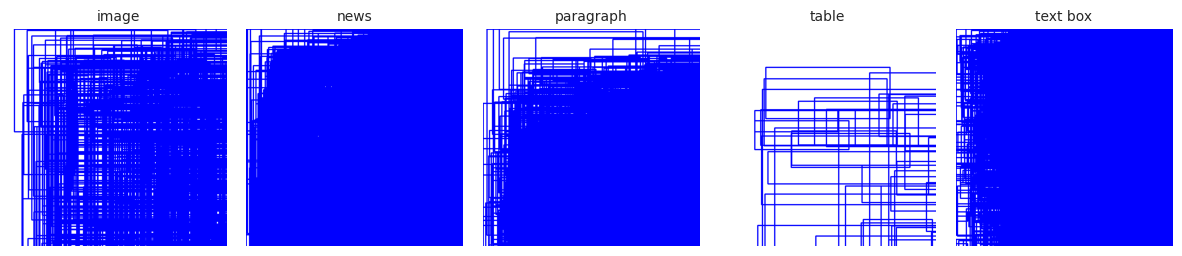

In [14]:

train_coco_annotations = COCO("/kaggle/input/newspaperlayout/zip/kaggle/working/new_folder/coco_annotations.json")
train_images_directory = Path("/kaggle/input/newspaperlayout/zip/kaggle/working/new_folder")
def visualize_annotations_stacked(coco_annotations, target_class_ids):
    # Filter categories based on target class IDs
    categories = [cat for cat in coco_annotations.loadCats(coco_annotations.getCatIds()) if cat['id'] in target_class_ids]
    num_categories = len(categories)

    # Create a blank canvas for each category
    class_canvases = [np.ones((512, 512, 3), dtype=np.uint8) * 255 for _ in range(num_categories)]

    # Extract class names
    class_names = [category['name'] for category in categories]

    # Iterate over each image
    for img_id in coco_annotations.imgs:
        img_info = coco_annotations.loadImgs(img_id)[0]
        image_path = train_images_directory / img_info["file_name"]
        image = plt.imread(image_path)

        # Load annotations for the image
        annotation_ids = coco_annotations.getAnnIds(imgIds=[img_id], catIds=target_class_ids)
        annotations = coco_annotations.loadAnns(annotation_ids)

        # Draw annotations on respective class canvas
        for ann in annotations:
            category_id = ann['category_id']
            bbox = ann['bbox']
            bbox_x, bbox_y, bbox_width, bbox_height = bbox
            bbox_x_end = bbox_x + bbox_width
            bbox_y_end = bbox_y + bbox_height

            canvas_index = target_class_ids.index(category_id)  # Get the index of the current category ID in target_class_ids
            canvas = class_canvases[canvas_index]
            cv2.rectangle(canvas, (int(bbox_x), int(bbox_y)), (int(bbox_x_end), int(bbox_y_end)), (255, 0, 0), 2)

    # Plot the stacked annotations with class names
    fig, axes = plt.subplots(1, num_categories, figsize=(15, 5))
    plt.subplots_adjust(wspace=0.09)
    for i, (canvas, class_name) in enumerate(zip(class_canvases, class_names)):
        axes[i].imshow(cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB before plotting
        axes[i].set_title(class_name,fontsize=10)
        axes[i].axis('off')

    plt.show()

# Example usage with classes 1, 2, 3, 4, and 5
target_class_ids = [1, 2, 3, 4, 5]
visualize_annotations_stacked(train_coco_annotations, target_class_ids)

loading annotations into memory...
Done (t=6.86s)
creating index...
index created!


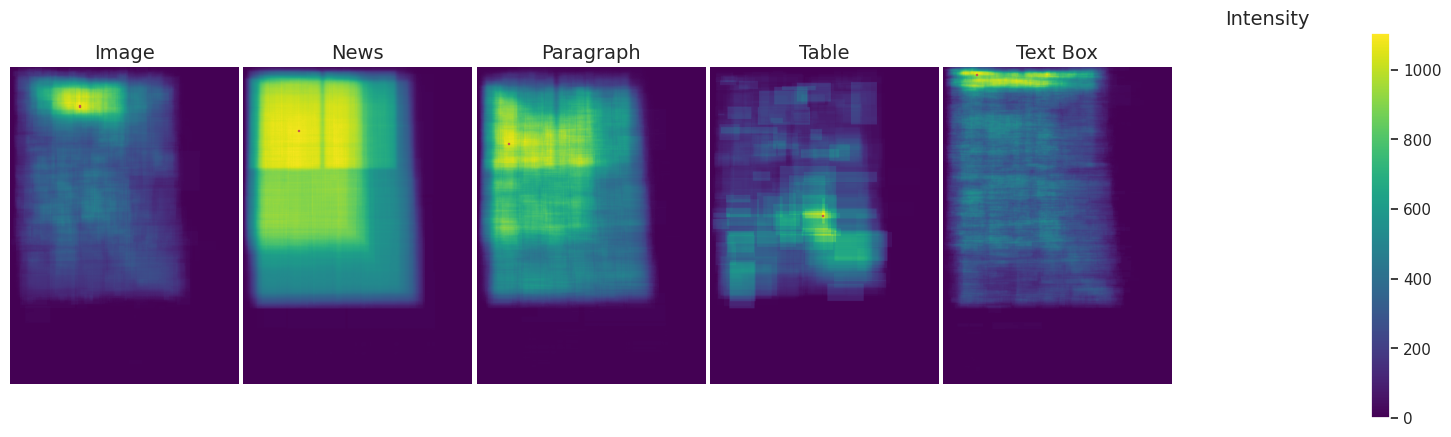

<Figure size 640x480 with 0 Axes>

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Rectangle
from pycocotools.coco import COCO
from pathlib import Path

train_coco_annotations = COCO("/kaggle/input/newspaperlayout/zip/kaggle/working/new_folder/coco_annotations.json")
train_images_directory = Path("/kaggle/input/newspaperlayout/zip/kaggle/working/new_folder")
category_id_to_name = {
    1: "Image",
    2: "News",
    3: "Paragraph",
    4: "Table",
    5: "Text Box"
}

def visualize_annotations_heatmap(coco_annotations, target_class_ids):
    # Define colormap for the heatmap
    cmap = 'viridis'

    # Initialize maximum coordinates of bounding boxes
    max_x, max_y = 0, 0

    # Iterate over each image
    for img_id in coco_annotations.imgs:
        img_info = coco_annotations.loadImgs(img_id)[0]
        image_path = train_images_directory / img_info["file_name"]
        image = plt.imread(image_path)

        # Load annotations for the image
        annotation_ids = coco_annotations.getAnnIds(imgIds=[img_id], catIds=target_class_ids)
        annotations = coco_annotations.loadAnns(annotation_ids)

        # Update maximum coordinates of bounding boxes
        for ann in annotations:
            bbox = ann['bbox']
            bbox_x, bbox_y, bbox_width, bbox_height = bbox
            bbox_x_end = bbox_x + bbox_width
            bbox_y_end = bbox_y + bbox_height

            max_x = max(max_x, bbox_x_end)
            max_y = max(max_y, bbox_y_end)

    # Determine heatmap size based on maximum coordinates
    heatmap_size = (int(max_y) + 20, int(max_x) + 20)  # Add some padding for better visualization

    # Initialize heatmaps for each class
    heatmaps = [np.zeros(heatmap_size) for _ in range(len(target_class_ids))]

    # Iterate over each image again to update heatmaps
    for img_id in coco_annotations.imgs:
        img_info = coco_annotations.loadImgs(img_id)[0]
        image_path = train_images_directory / img_info["file_name"]
        image = plt.imread(image_path)

        # Load annotations for the image
        annotation_ids = coco_annotations.getAnnIds(imgIds=[img_id], catIds=target_class_ids)
        annotations = coco_annotations.loadAnns(annotation_ids)

        # Update heatmap for each class
        for ann in annotations:
            category_id = ann['category_id']
            bbox = ann['bbox']
            bbox_x, bbox_y, bbox_width, bbox_height = bbox
            bbox_x_end = bbox_x + bbox_width
            bbox_y_end = bbox_y + bbox_height

            # Update heatmap counts for each pixel within the bounding box
            heatmaps[target_class_ids.index(category_id)][int(bbox_y):int(bbox_y_end), int(bbox_x):int(bbox_x_end)] += 1

    # Plot the heatmaps
    fig, axes = plt.subplots(1, len(target_class_ids) + 1, figsize=(18, 5))
    plt.subplots_adjust(wspace=0.02)
    for i, (heatmap, class_id) in enumerate(zip(heatmaps, target_class_ids)):
        axes[i].imshow(heatmap, cmap=cmap)
        axes[i].set_title(category_id_to_name[class_id],fontsize=14)  # Use category name based on the dictionary
        axes[i].axis('off')

        # Add bounding box for visualization
        max_value = np.max(heatmap)
        max_index = np.argmax(heatmap)
        max_y, max_x = np.unravel_index(max_index, heatmap.shape)
        max_bbox = Rectangle((max_x-10, max_y-10), 20, 20, linewidth=1, edgecolor='r', facecolor='none')
        axes[i].add_patch(max_bbox)
    
    # Plot colorbar for the heatmap
    sm = plt.cm.ScalarMappable(cmap=cmap)
    sm.set_array(heatmaps[0])  # Use the first heatmap to determine the color range
    plt.colorbar(sm, ax=axes[-1], orientation='vertical')
    plt.subplots_adjust(wspace=0.02)
    axes[-1].axis('off')
    axes[-1].set_title('Intensity',fontsize=14)

    plt.show()
    plt.savefig("heatmap.png")

# Example usage with classes 1, 2, 3, 4, and 5
target_class_ids = [1, 2, 3, 4, 5]
visualize_annotations_heatmap(train_coco_annotations, target_class_ids)

loading annotations into memory...
Done (t=9.89s)
creating index...
index created!


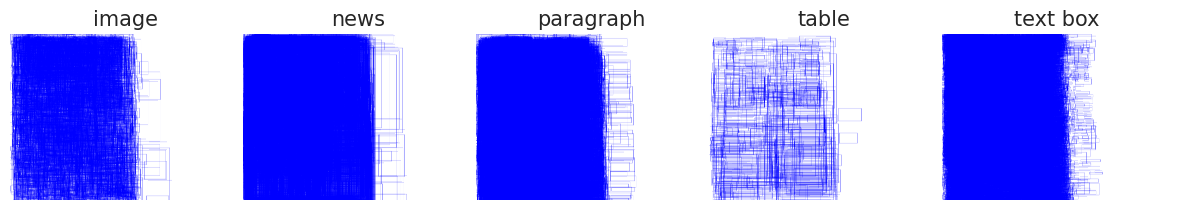

In [18]:

train_coco_annotations = COCO("/kaggle/input/newspaperlayout/zip/kaggle/working/new_folder/coco_annotations.json")
train_images_directory = Path("/kaggle/input/newspaperlayout/zip/kaggle/working/new_folder")
def visualize_annotations_stacked(coco_annotations, target_class_ids):
    # Filter categories based on target class IDs
    categories = [cat for cat in coco_annotations.loadCats(coco_annotations.getCatIds()) if cat['id'] in target_class_ids]
    num_categories = len(categories)

    # Initialize variables to track the maximum coordinates of bounding boxes
    max_x, max_y = 0, 0

    # Iterate over each image
    for img_id in coco_annotations.imgs:
        img_info = coco_annotations.loadImgs(img_id)[0]
        image_path = train_images_directory / img_info["file_name"]
        image = plt.imread(image_path)

        # Load annotations for the image
        annotation_ids = coco_annotations.getAnnIds(imgIds=[img_id], catIds=target_class_ids)
        annotations = coco_annotations.loadAnns(annotation_ids)

        # Update maximum coordinates of bounding boxes
        for ann in annotations:
            bbox = ann['bbox']
            bbox_x, bbox_y, bbox_width, bbox_height = bbox
            bbox_x_end = bbox_x + bbox_width
            bbox_y_end = bbox_y + bbox_height

            max_x = max(max_x, bbox_x_end)
            max_y = max(max_y, bbox_y_end)

    # Determine the canvas size based on the maximum coordinates of bounding boxes
    canvas_size = (int(max_x) + 10, int(max_y) + 10, 3)

    # Create a blank canvas for each category with dynamic size
    class_canvases = [np.ones(canvas_size, dtype=np.uint8) * 255 for _ in range(num_categories)]

    # Extract class names
    class_names = [category['name'] for category in categories]

    # Iterate over each image again to draw annotations on respective class canvas
    for img_id in coco_annotations.imgs:
        img_info = coco_annotations.loadImgs(img_id)[0]
        image_path = train_images_directory / img_info["file_name"]

        # Load annotations for the image
        annotation_ids = coco_annotations.getAnnIds(imgIds=[img_id], catIds=target_class_ids)
        annotations = coco_annotations.loadAnns(annotation_ids)

        # Draw annotations on respective class canvas
        for ann in annotations:
            category_id = ann['category_id']
            bbox = ann['bbox']
            bbox_x, bbox_y, bbox_width, bbox_height = bbox
            bbox_x_end = bbox_x + bbox_width
            bbox_y_end = bbox_y + bbox_height

            canvas_index = target_class_ids.index(category_id)
            canvas = class_canvases[canvas_index]
            cv2.rectangle(canvas, (int(bbox_x), int(bbox_y)), (int(bbox_x_end), int(bbox_y_end)), (255, 0, 0), 2)

    # Plot the stacked annotations with class names
    fig, axes = plt.subplots(1, num_categories, figsize=(15, 5))
    plt.subplots_adjust(wspace=0.01)
    for i, (canvas, class_name) in enumerate(zip(class_canvases, class_names)):
        axes[i].imshow(cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB))
        axes[i].set_title(class_name,fontsize=15)
        axes[i].axis('off')

    plt.show()

# Example usage with classes 1, 2, 3, 4, and 5
target_class_ids = [1, 2, 3, 4, 5]
visualize_annotations_stacked(train_coco_annotations, target_class_ids)